In [95]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
print(f'''Pandas Version: {pd.__version__}''')
print(f'''NLTK Version: {nltk.__version__}''')
print(f'''Seaborn Version: {sns.__version__}''')

Pandas Version: 1.1.3
NLTK Version: 3.5
Seaborn Version: 0.11.0


<h3> Reading and Analysing the tabular data </h3>

In [2]:
#Reading the reviews csv file using pandas read_csv function

reviews = pd.read_csv('andrew_skrzat_nidhi_danayak_laura_taddei_dataset.csv')

In [3]:
reviews.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
# Adding an extra column to calculate review length
reviews["review_length"] = reviews['Review'].apply(len) 

In [5]:
# Check if the column was added correctly
reviews.head()

,Review,Rating,review_length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281


In [6]:
#checking our dataset's shape
reviews.shape

(20491, 3)

In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Review         20491 non-null  object
 1   Rating         20491 non-null  int64 
 2   review_length  20491 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 480.4+ KB


In [8]:
reviews.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,20491.0,3.952223,1.233030,1.0,3.0,4.0,5.0,5.0
review_length,20491.0,724.896833,689.101024,44.0,339.0,537.0,859.0,13501.0


In [9]:
#Unique Ratings
reviews['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [10]:
#Checking skewness
reviews['Rating'].skew()

-1.0772186790797589

<h3> Checking Null, NA Values</h3>

<AxesSubplot:>

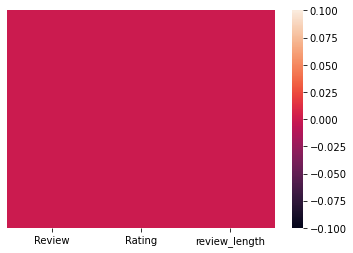

In [11]:
# Check NULL values
sns.heatmap(data=reviews.isnull(), yticklabels=False)

In [12]:
# Check NA values
reviews.isna().any()

Review           False
Rating           False
review_length    False
dtype: bool

<h2> PART 1 </h2>
<h2> Exploratory Data Analysis</h2>

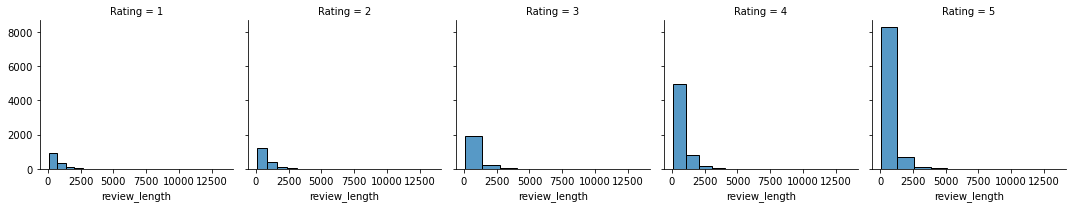

In [13]:
g = sns.FacetGrid(data= reviews, col= 'Rating')
g.map(sns.histplot, 'review_length', bins=10)

#This plot explains a linear relation between rating and a reviews word_count

<AxesSubplot:xlabel='Rating', ylabel='review_length'>

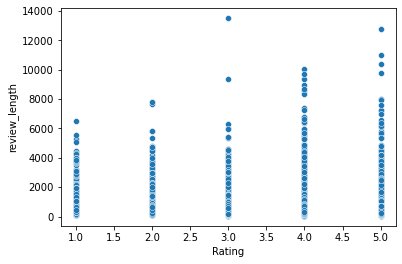

In [14]:
sns.scatterplot(x='Rating', y='review_length', data=reviews)

<AxesSubplot:xlabel='Rating', ylabel='review_length'>

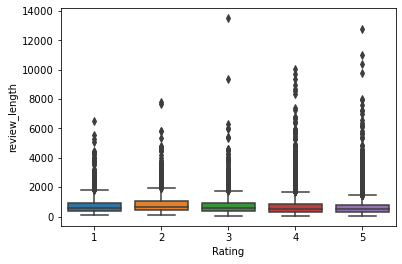

In [15]:
sns.boxplot(y='review_length', x='Rating', data=reviews)

<AxesSubplot:xlabel='Rating', ylabel='count'>

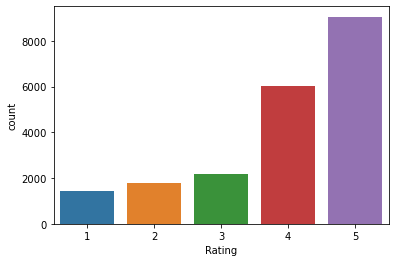

In [16]:
sns.countplot(x='Rating', data= reviews)
#There are mostly 5 star reviews for the hotels which tells us that we have a Negatively Skewed Data

<H3> Generating a Word Cloud of Reviews</H3>

In [98]:
#!pip install wordcloud
from wordcloud import WordCloud

In [18]:
reviews.head()

,Review,Rating,review_length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281


In [19]:
#Combining all the review rows into a single list to compute wordcloud
combinedReviews = (" ").join(reviews['Review'].tolist())

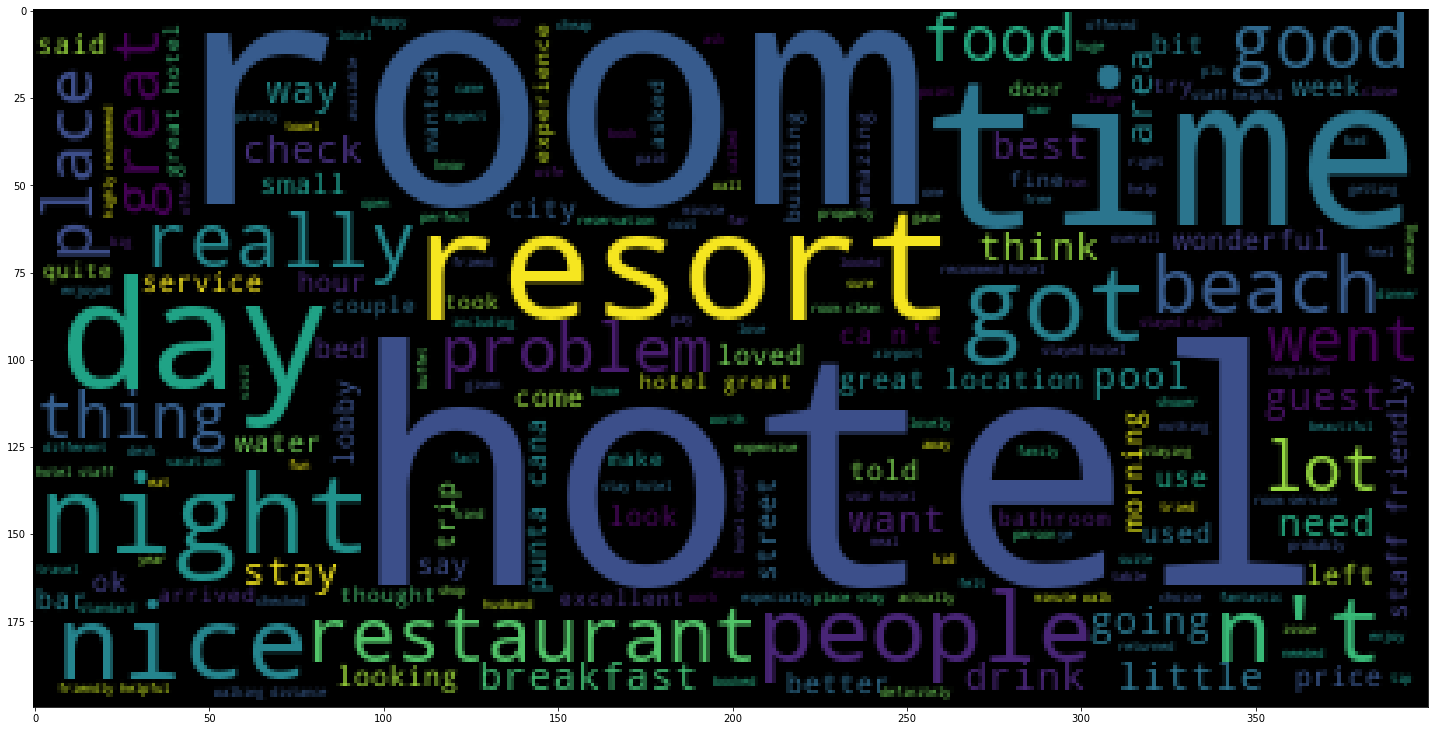

In [20]:
#Plotting word frequency using wordcloud to show the most occurring words in the reviews
plt.figure(figsize= (25,18))
plt.imshow(WordCloud().generate(combinedReviews))

<h3> Text Preprocessing </h3>

In [21]:
from nltk.corpus import stopwords
import string
import re
from nltk.stem import PorterStemmer 
from nltk import word_tokenize, collections

<h4>Adding a Sentiment Column to Facilitate Sentiment Analysis </h4>

In [22]:
for i in range(len(reviews)):
    if reviews['Rating'][i] == 1 or reviews['Rating'][i] == 2:
        reviews['Sentiment'] = 'Negative'
    elif reviews['Rating'][i] == 3:
        reviews['Sentiment']= 'Neutral'
    elif reviews['Rating'][i] == 5 or reviews['Rating'][i] == 4:
        reviews['Sentiment']= 'Positive'

In [23]:
for i in range(len(reviews)):
    if reviews['Rating'][i] == 1 or reviews['Rating'][i] == 2:
        reviews['Sentiment'][i] = 'Negative'
    elif reviews['Rating'][i] == 3:
        reviews['Sentiment'][i] = 'Neutral'
    elif reviews['Rating'][i] == 5 or reviews['Rating'][i] == 4:
        reviews['Sentiment'][i] = 'Positive'

In [24]:
reviews.head()

,Review,Rating,review_length,Sentiment
0,nice hotel expensive parking got good deal sta...,4,593,Positive
1,ok nothing special charge diamond member hilto...,2,1689,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,1427,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,600,Positive
4,"great stay great stay, went seahawk game aweso...",5,1281,Positive


In [25]:
pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')  #pattern is now a list of all the stop words

ps = PorterStemmer() #Instantiating Porter Stemmer

In [26]:
#Function for Text Preprocessing
def text_process(text):
    text = text.lower() #Converting the text to lower case
    text= re.sub('\[.*?\]', '', text) #Removing brackets
    text= re.sub('[%s]' % re.escape(string.punctuation), '', text) #Removing punctuations
    text= re.sub('\w*\d\w*', '', text) #Removing digits
    text= pattern.sub('', text) #Removing stop words
    token= word_tokenize(text) #Word Tokenisation for stemming
    text= ' '.join([ps.stem(t) for t in token]) #Data stemming
    return text

cleaned1 = lambda x: text_process(x)

In [27]:
#Check if the preprocessing function words properly
reviews['CleanedReviews']= reviews['Review'].apply(cleaned1) 

#Check if the stop words have been removed by comparing the cleaned review's length with original review length
reviews['Cleaned_Review_Length']= reviews['CleanedReviews'].apply(len)

In [28]:
reviews.head()

,Review,Rating,review_length,Sentiment,CleanedReviews,Cleaned_Review_Length
0,nice hotel expensive parking got good deal sta...,4,593,Positive,nice hotel expens park got good deal stay hote...,480
1,ok nothing special charge diamond member hilto...,2,1689,Negative,ok noth special charg diamond member hilton de...,1413
2,nice rooms not 4* experience hotel monaco seat...,3,1427,Neutral,nice room experi hotel monaco seattl good hote...,1181
3,"unique, great stay, wonderful time hotel monac...",5,600,Positive,uniqu great stay wonder time hotel monaco loca...,508
4,"great stay great stay, went seahawk game aweso...",5,1281,Positive,great stay great stay went seahawk game awesom...,1064


<h2> PART 2 </h2>
<h2> Sentiment Analysis</h2>

<h3> Data Modelling using Multinomial Naive Bayes </h3>

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer #Library for Bag of Words and TFIDF Calculation
from sklearn.naive_bayes import MultinomialNB #Naive Bayes Library
from sklearn.model_selection import train_test_split #Library to split the data into training and testing datasets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(reviews['CleanedReviews'], reviews['Sentiment'], test_size=0.3, random_state=101)

In [31]:
from sklearn.pipeline import Pipeline
Bayes_pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=cleaned1)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors with Naive Bayes classifier
])

In [32]:
Bayes_pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function <lambda> at 0x0000017D7E814EE0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [33]:
Bayes_prediction = Bayes_pipeline.predict(X_test)

<h3> Measuring Multinomial Bayes's Model Accuracy </h3>

In [34]:
#importing the required libraries to measure accuracy
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(f'''\033[1mClassification Report using Naive Bayes:\033[0m

{classification_report(y_test, Bayes_prediction)}
\033[1mConfusion Matrix using Naive Bayes: \033[0m

{confusion_matrix(y_test, Bayes_prediction)}''')

Classification Report using Naive Bayes:

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       956
     Neutral       0.00      0.00      0.00       663
    Positive       0.74      1.00      0.85      4529

    accuracy                           0.74      6148
   macro avg       0.25      0.33      0.28      6148
weighted avg       0.54      0.74      0.62      6148

Confusion Matrix using Naive Bayes: 

[[   0    0  956]
 [   0    0  663]
 [   0    0 4529]]


In [36]:
example =["Dirty Room"]
result = Bayes_pipeline.predict(example)
print(result)

['Positive']


In [37]:
example =["Great Bed"]
result = Bayes_pipeline.predict(example)
print(result)

['Positive']


<h4> This shows the model's inaccuracy in Negative sentiment prediction </h4>

<h3>  Data Modelling using Logistic Regression </h3>

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
Logistic_pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(max_iter=20000)),  # train on TF-IDF vectors with Logistic Regression Classification
])

In [40]:
Logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000017D7E8144C0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression(max_iter=20000))])

In [41]:
Logistic_prediction = Logistic_pipeline.predict(X_test)

<h3> Measuring Logistic Regression's Model Accuracy </h3>

In [42]:
print(f'''\033[1mClassification Report using Logistic Regression:\033[0m

{classification_report(y_test, Logistic_prediction)}
\033[1mConfusion Matrix using Logistic Regression: \033[0m

{confusion_matrix(y_test, Logistic_prediction)}''')

Classification Report using Logistic Regression:

              precision    recall  f1-score   support

    Negative       0.63      0.12      0.21       956
     Neutral       0.00      0.00      0.00       663
    Positive       0.75      0.99      0.86      4529

    accuracy                           0.75      6148
   macro avg       0.46      0.37      0.35      6148
weighted avg       0.65      0.75      0.66      6148

Confusion Matrix using Logistic Regression: 

[[ 119    0  837]
 [  30    0  633]
 [  41    0 4488]]


In [43]:
example =["Worst Stay"]
result = Logistic_pipeline.predict(example)
print(result)

['Negative']


In [44]:
example =["Great Bed"]
result = Logistic_pipeline.predict(example)
print(result)

['Positive']


In [45]:
example =["Friendly Staff"]
result = Logistic_pipeline.predict(example)
print(result)

['Positive']


In [46]:
example =["Dirty Room"]
result = Logistic_pipeline.predict(example)
print(result)

['Negative']


<h4> This is a Neutral Rating. Hence this shows the model's inaccuracy in predecting Neutral Sentiment </h4>

<h3>  Model Enhancement using Grid Search </h3>

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
tfidf_pipeline = Pipeline([('bow', CountVectorizer(analyzer=cleaned1)), 
                           ('tfidf', TfidfTransformer())])
#This pipeline does not include our classification model because that will be used separately in grid search

In [49]:
tfidf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function <lambda> at 0x0000017D7E814EE0>)),
                ('tfidf', TfidfTransformer())])

In [50]:
tfidf_transformed = tfidf_pipeline.fit_transform(X_train)

In [51]:
param_grid = {'C': [0.1,1, 10, 100, 1000]} #using 5 values of C to train using gridSearchCV

In [52]:
grid = GridSearchCV(LogisticRegression(max_iter=20000), param_grid,refit=True,verbose=3)

In [53]:
grid.fit(tfidf_transformed, y_train)  #Fitting the data to fit out the best hyperparamenters

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..........................................C=0.1; total time=   0.2s
[CV 2/5] END ..........................................C=0.1; total time=   0.1s
[CV 3/5] END ..........................................C=0.1; total time=   0.1s
[CV 4/5] END ..........................................C=0.1; total time=   0.2s
[CV 5/5] END ..........................................C=0.1; total time=   0.2s
[CV 1/5] END ............................................C=1; total time=   0.5s
[CV 2/5] END ............................................C=1; total time=   0.5s
[CV 3/5] END ............................................C=1; total time=   0.5s
[CV 4/5] END ............................................C=1; total time=   0.6s
[CV 5/5] END ............................................C=1; total time=   0.4s
[CV 1/5] END ...........................................C=10; total time=   1.2s
[CV 2/5] END ....................................

GridSearchCV(estimator=LogisticRegression(max_iter=20000),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, verbose=3)

In [54]:
grid.best_params_

{'C': 100}

In [55]:
Logistic_pipeline1 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(C=100, max_iter= 20000)),  # train on TF-IDF vectors with Logistic Regression Classification
])

In [56]:
Logistic_pipeline1.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000017D7E8144C0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression(C=100, max_iter=20000))])

In [57]:
Logistic_prediction1 = Logistic_pipeline1.predict(X_test)

<h3> Measuring GridSearch's Model Accuracy </h3>

In [58]:
print(f'''\033[1mClassification Report using Grid Search on Logistic Regression:\033[0m

{classification_report(y_test, Logistic_prediction1)}
\033[1mConfusion Matrix using Grid Search on Logistic Regression: \033[0m

{confusion_matrix(y_test, Logistic_prediction1)}''')

Classification Report using Grid Search on Logistic Regression:

              precision    recall  f1-score   support

    Negative       0.58      0.23      0.33       956
     Neutral       0.27      0.00      0.01       663
    Positive       0.77      0.98      0.86      4529

    accuracy                           0.76      6148
   macro avg       0.54      0.40      0.40      6148
weighted avg       0.68      0.76      0.69      6148

Confusion Matrix using Grid Search on Logistic Regression: 

[[ 218    3  735]
 [  59    3  601]
 [ 101    5 4423]]


In [59]:
example =["okay stay"]
result = Logistic_pipeline1.predict(example)
print(result)

['Negative']


<h4> This model gives a much better accuracy but again turns out to be inaccurate with neutral comments </h4>

<h2> Sentiment Analysis Interpretation </h2>
<p>
<li> After trying 3 different classifier models to train our data we are still unable to find an accurate model which correctly predicts Neutral or Negative Reviews </li>

<li>One major reason for this limitation can be the high Negative Skewness of the data, which gives our model less Negative and Neutral reviews as compared to the positive reviews to make predictions </li>
    
<li>This data imbalance/ skewness is therefore seen as a major limitation while trying to do Sentiment Analysis on our Dataset</li>

<li> To treat this imbalance we use a python library called SMOTE which will oversample our minority labels</li>
</p>

<h3> Using SMOTE to balance out the data imbalance </h3>

In [60]:
#!pip install imbalanced-learn

In [101]:
from imblearn.over_sampling import SMOTE #importing smote library

In [62]:
sm= SMOTE(random_state=101) #instantiating SMOTE

In [63]:
smote_tfidf_pipeline = Pipeline([('bow', CountVectorizer(analyzer=cleaned1)), 
                           ('tfidf', TfidfTransformer())])

In [64]:
smote_tfidf = smote_tfidf_pipeline.fit_transform(reviews['CleanedReviews']) 

In [65]:
X_sm, y_sm = sm.fit_resample(smote_tfidf, reviews['Sentiment'])  #OVERSAMPLING our dataset using smote's fit_resample method

#Smote only takes float values in its resample method, thus we first represent our data into it's TFIDF values and pass that into smote 

In [66]:
#Comparing the shape of our dataset before and after smote
print(f'''\033[1mShape of reviews before smote:\033[0m \033[94m{smote_tfidf.shape}\033[0m
\033[1mShape of reviews before smote:\033[0m \033[94m{X_sm.shape}''')

Shape of reviews before smote: (20491, 66)
Shape of reviews before smote: (45279, 66)


In [67]:
#Checking the balanced count

print(f'''\033[1mBalance between the three sentiments using smote:
\033[94m{y_sm.value_counts()}''')

Balance between the three sentiments using smote:
Neutral     15093
Positive    15093
Negative    15093
Name: Sentiment, dtype: int64


In [68]:
#Splitting the oversampled data into train and test sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.3, random_state=101)

<h3> Logistic Regression using Smote </h3>

In [69]:
#Applying Logistic Regression on the oversampled data
Smote_Logistic = LogisticRegression(C=100, max_iter= 20000)

In [70]:
Smote_Logistic.fit(X_train_sm, y_train_sm)

LogisticRegression(C=100, max_iter=20000)

In [71]:
Smote_Prediction= Smote_Logistic.predict(X_test_sm)

In [72]:
#Checking for the accuracy
print(f'''\033[1mClassification Report After Smote:\033[0m

{classification_report(y_test_sm, Smote_Prediction)}
\033[1mConfusion Matrix After Smote: \033[0m

{confusion_matrix(y_test_sm, Smote_Prediction)}''')

Classification Report After Smote:

              precision    recall  f1-score   support

    Negative       0.57      0.62      0.59      4545
     Neutral       0.48      0.47      0.48      4463
    Positive       0.60      0.57      0.58      4576

    accuracy                           0.55     13584
   macro avg       0.55      0.55      0.55     13584
weighted avg       0.55      0.55      0.55     13584

Confusion Matrix After Smote: 

[[2817 1075  653]
 [1294 2115 1054]
 [ 815 1175 2586]]


<h3> Applying Smote's oversampled data on Naive Bayes Algorithm </h3>

In [73]:
Smote_Naive = MultinomialNB()

In [74]:
Smote_Naive.fit(X_train_sm, y_train_sm)

MultinomialNB()

In [75]:
Smote_Predictions = Smote_Naive.predict(X_test_sm)

In [76]:
print(classification_report(y_test_sm, Smote_Predictions))
print(confusion_matrix(y_test_sm, Smote_Predictions))

              precision    recall  f1-score   support

    Negative       0.60      0.21      0.31      4545
     Neutral       0.38      0.86      0.52      4463
    Positive       0.71      0.29      0.41      4576

    accuracy                           0.45     13584
   macro avg       0.56      0.45      0.41     13584
weighted avg       0.56      0.45      0.41     13584

[[ 943 3379  223]
 [ 312 3833  318]
 [ 316 2949 1311]]


<h2> PART 3 </h2>
<h2> Finding Frequent tri-grams in the reviews to determine the top 20 reasons which results in a Positive or Negative Rating</h2>

<h3> Splitting the data into 3 tables according to their ratings </h3>

In [77]:
Positive_Reviews = pd.DataFrame()
for i in range(len(reviews)):
    if reviews['Rating'][i]==4 or reviews['Rating'][i]==5:
        Positive_Reviews = Positive_Reviews.append(reviews.iloc[i][['CleanedReviews', 'Rating', 'Sentiment']])

In [78]:
Negative_Reviews = pd.DataFrame()
for i in range(len(reviews)):
    if reviews['Rating'][i]==1 or reviews['Rating'][i]==2:
        Negative_Reviews = Negative_Reviews.append(reviews.iloc[i][['CleanedReviews', 'Rating', 'Sentiment']])

In [79]:
Neutral_Reviews = pd.DataFrame()
for i in range(len(reviews)):
    if reviews['Rating'][i]==3:
        Neutral_Reviews = Neutral_Reviews.append(reviews.loc[i][['CleanedReviews', 'Rating', 'Sentiment']])

In [80]:
Positive_Reviews.head()

,CleanedReviews,Rating,Sentiment
0,nice hotel expens park got good deal stay hote...,4.0,Positive
3,uniqu great stay wonder time hotel monaco loca...,5.0,Positive
4,great stay great stay went seahawk game awesom...,5.0,Positive
5,love monaco staff husband stay hotel crazi wee...,5.0,Positive
6,cozi stay raini citi husband spent night monac...,5.0,Positive


In [81]:
Positive_Reviews.shape

(15093, 3)

In [82]:
Negative_Reviews.head()

,CleanedReviews,Rating,Sentiment
1,ok noth special charg diamond member hilton de...,2.0,Negative
10,poor valu stay monaco seattl juli nice hotel p...,2.0,Negative
15,horribl custom servic hotel stay februari frie...,1.0,Negative
16,disappoint say anticip stay hotel monaco base ...,2.0,Negative
24,great locat need intern upgrad advantag north ...,2.0,Negative


In [83]:
Negative_Reviews.shape

(3214, 3)

In [84]:
Neutral_Reviews.head()

,CleanedReviews,Rating,Sentiment
2,nice room experi hotel monaco seattl good hote...,3.0,Neutral
13,nice hotel nice staff hotel love staff quit ru...,3.0,Neutral
19,hmmmmm say realli high hope hotel monaco chose...,3.0,Neutral
25,nt mind nois place great read review nois use ...,3.0,Neutral
27,met expect central locat hotel block water pop...,3.0,Neutral


In [85]:
Neutral_Reviews.shape

(2184, 3)

<h3>Calculating Frequent tri-grams</h3>

In [86]:
from nltk.util import ngrams

In [87]:
positive_list= (" ").join(Positive_Reviews['CleanedReviews'].to_list())
positive_tri_grams = ngrams(positive_list.split(), n= 3)
positive_tri_gramFreq = collections.Counter(positive_tri_grams)
positive_tri_gramFreq.most_common(20)

[(('staff', 'friendli', 'help'), 638),
 (('hotel', 'great', 'locat'), 497),
 (('highli', 'recommend', 'hotel'), 322),
 (('great', 'place', 'stay'), 267),
 (('old', 'san', 'juan'), 244),
 (('flat', 'screen', 'tv'), 239),
 (('ca', 'nt', 'wait'), 237),
 (('great', 'hotel', 'great'), 225),
 (('king', 'size', 'bed'), 219),
 (('stay', 'hotel', 'night'), 196),
 (('hotel', 'staff', 'friendli'), 182),
 (('easi', 'walk', 'distanc'), 171),
 (('good', 'valu', 'money'), 169),
 (('free', 'internet', 'access'), 161),
 (('la', 'cart', 'restaur'), 155),
 (('hotel', 'stay', 'hotel'), 152),
 (('staff', 'help', 'friendli'), 149),
 (('great', 'locat', 'great'), 147),
 (('room', 'good', 'size'), 145),
 (('ca', 'nt', 'beat'), 145)]

In [88]:
negative_list= (" ").join(Negative_Reviews['CleanedReviews'].to_list())
negative_tri_grams = ngrams(negative_list.split(), n= 3)
negative_tri_gramFreq = collections.Counter(negative_tri_grams)
negative_tri_gramFreq.most_common(20)

[(('old', 'san', 'juan'), 56),
 (('king', 'size', 'bed'), 51),
 (('worst', 'hotel', 'stay'), 41),
 (('hotel', 'great', 'locat'), 30),
 (('stay', 'hotel', 'night'), 30),
 (('resort', 'punta', 'cana'), 28),
 (('air', 'condit', 'work'), 27),
 (('wo', 'nt', 'stay'), 27),
 (('room', 'doubl', 'bed'), 27),
 (('final', 'got', 'room'), 26),
 (('review', 'trip', 'advisor'), 24),
 (('la', 'cart', 'restaur'), 24),
 (('worst', 'hotel', 'experi'), 22),
 (('staff', 'friendli', 'help'), 22),
 (('order', 'room', 'servic'), 22),
 (('hotel', 'good', 'locat'), 22),
 (('told', 'room', 'readi'), 22),
 (('room', 'smell', 'like'), 21),
 (('air', 'condit', 'room'), 21),
 (('non', 'smoke', 'room'), 21)]

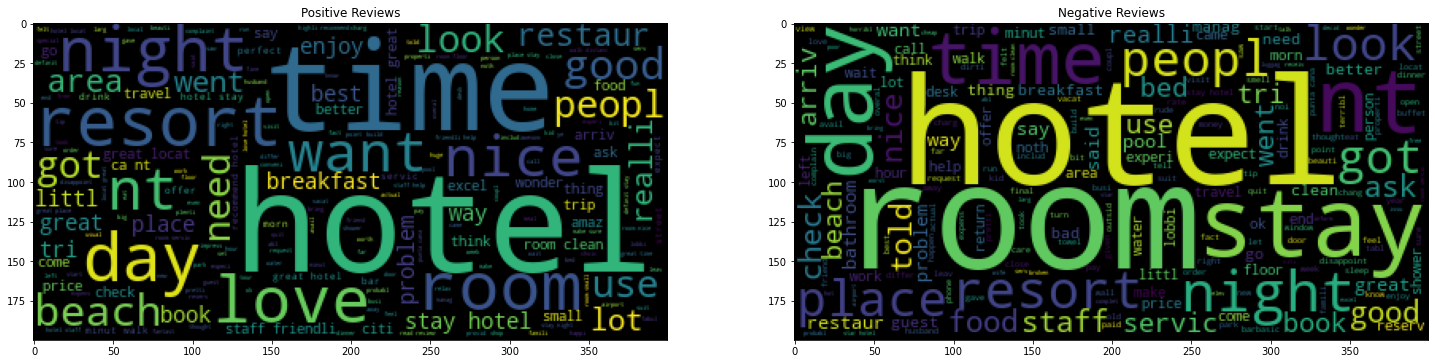

In [89]:
plt.figure(figsize=(25,25))
plt.subplot(1,2,1)
plt.imshow(WordCloud().generate(positive_list))
plt.title('Positive Reviews')
plt.subplot(1,2,2)
plt.title('Negative Reviews')
plt.imshow(WordCloud().generate(negative_list))

<h2> Frequent tri-gram Interpretation </h2>
    
<h3>The major features giving a hotel high ratings are:</h3>
    <ol><li>Friendly Staff</li>
    <li>Great Loaction</li> 
    <li>Flat Screen TV</li> 
    <li>Ala Carte Restaurant</li> 
    <li>Free Internet Access</li></ol>      
<h3>The major features giving a hotel low ratings are:</h3>
<ol><li>Bad Air Conditioning</li> 
    <li>Late Room Allocation</li> 
    <li>Room's Smell</li> 
    <li>Smoking/Non Smoking Rooms Availability </li> </ol> 
    
<p>Also, seeing the repetition of frequent words in both negative and positive reviews we can conclude that the absence of a 5 Star review feature can also led to a hotel getting a low rating</p>